<a href="https://colab.research.google.com/github/lellaby/-CSST106-CS4A-GALZOTE/blob/main/MP2_GALZOTE_CS4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Gilela Anne M. Galzote
Section: BSCS 4A

**Apply image processing techniques (scaling, rotation, blurring, edge detection) using OpenCV**

Step 1: Install OpenCV

In [ ]:
!pip install opencv-python-headless

Step 2: Import Necessary Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')

  plt.show()

Step 3: Load an Image

Saving galzote.jpg to galzote (2).jpg


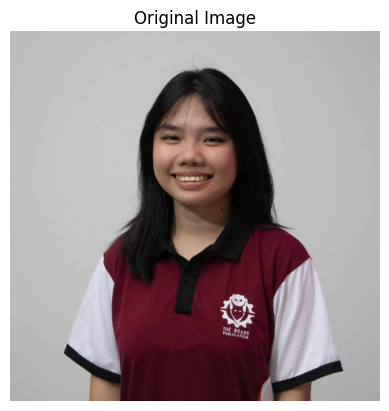

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

Exercise 1: Scaling and Rotation

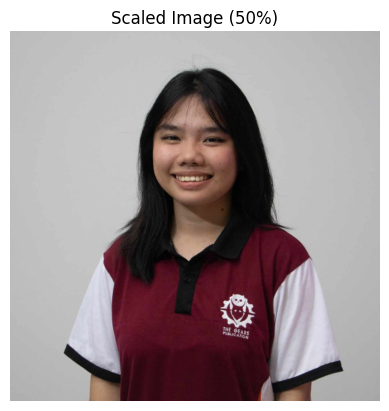

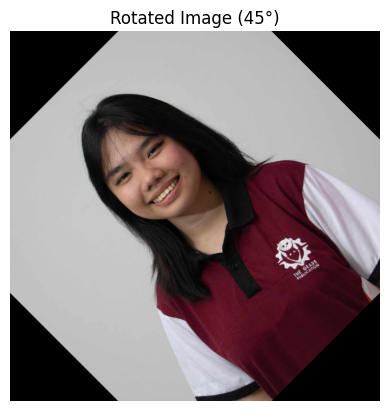

In [ ]:
def scale_image(img, scale_factor):
  height, width = img.shape[:2]
  scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
  return scaled_img


def rotate_image(img, angle):
  height, width = img.shape[:2]
  center = (width // 2, height // 2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(img, matrix, (width, height))
  return rotated_img

scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")


Exercise 2: Blurring Techniques

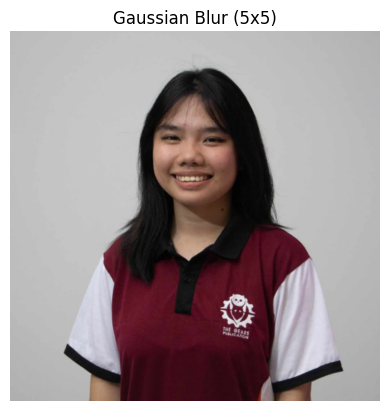

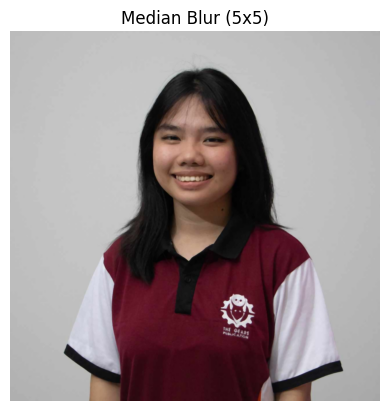

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

Exercise 3: Edge Detection using Canny

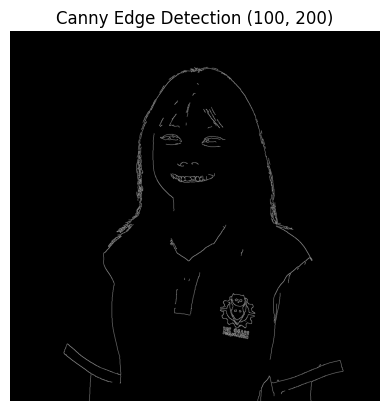

In [ ]:
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

Exercise 4: Basic Image Processor (Interactive)

In [ ]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  else:
    return img


Exercise 5: Comparison of Filtering Techniques

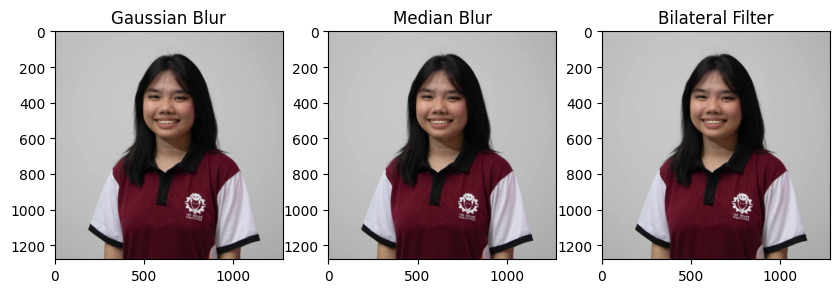

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")

plt.show()

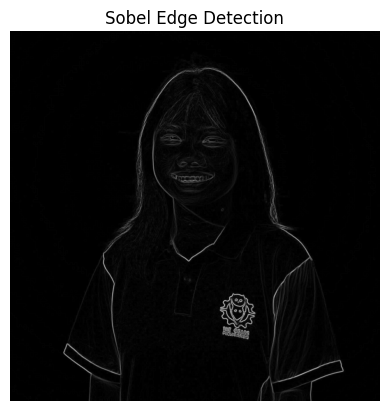

In [ ]:

def sobel_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
  sobel_combined = cv2.magnitude(sobelx, sobely)
  return sobel_combined

sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

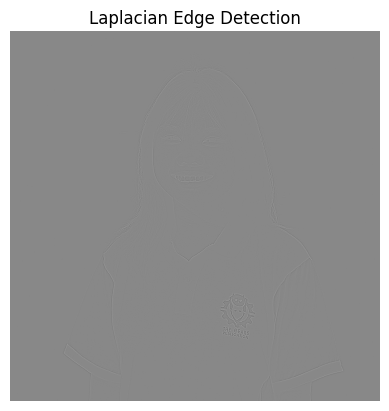

In [ ]:
def laplacian_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)
  return laplacian

laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

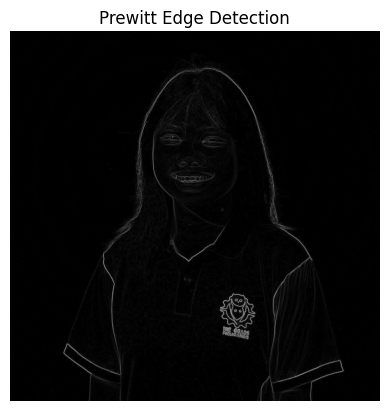

In [ ]:
def prewitt_edge_detection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)

  prewitt_combined = cv2.magnitude(prewittx, prewitty)
  return prewitt_combined

prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()


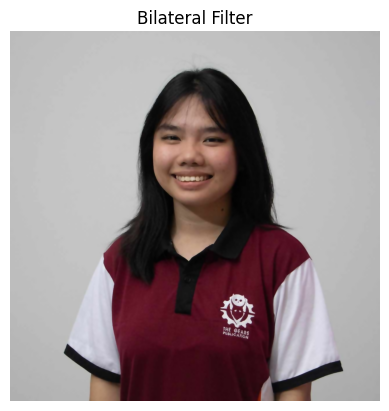

In [ ]:
def bilateral_blur(img):
  bilateral = cv2.bilateralFilter(img, 9, 75, 75)
  return bilateral

bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

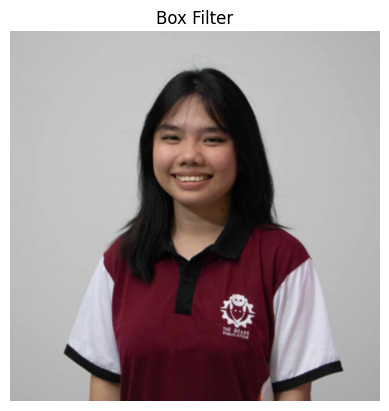

In [ ]:
def box_blur(img):
  box = cv2.boxFilter(img, -1, (5, 5))
  return box

box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

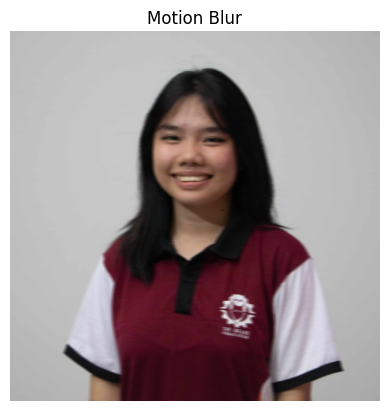

In [ ]:
def motion_blur(img):
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
  motion_blurred = cv2.filter2D(img, -1, kernel)
  return motion_blurred

motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

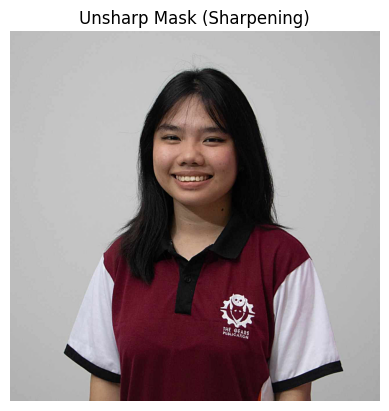

In [ ]:
def unsharp_mask(img):
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
  return sharpened

sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

In [ ]:
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (5, 5), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 5)
  elif action == 'canny':
    return cv2.Canny(img, 100, 200)
  elif action == 'sobel':
    return sobel_edge_detection(img)
  elif action == 'laplacian':
    return laplacian_edge_detection(img)
  elif action == 'prewitt':
    return prewitt_edge_detection(img)
  elif action == 'bilateral_blur':
    return bilateral_blur(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img

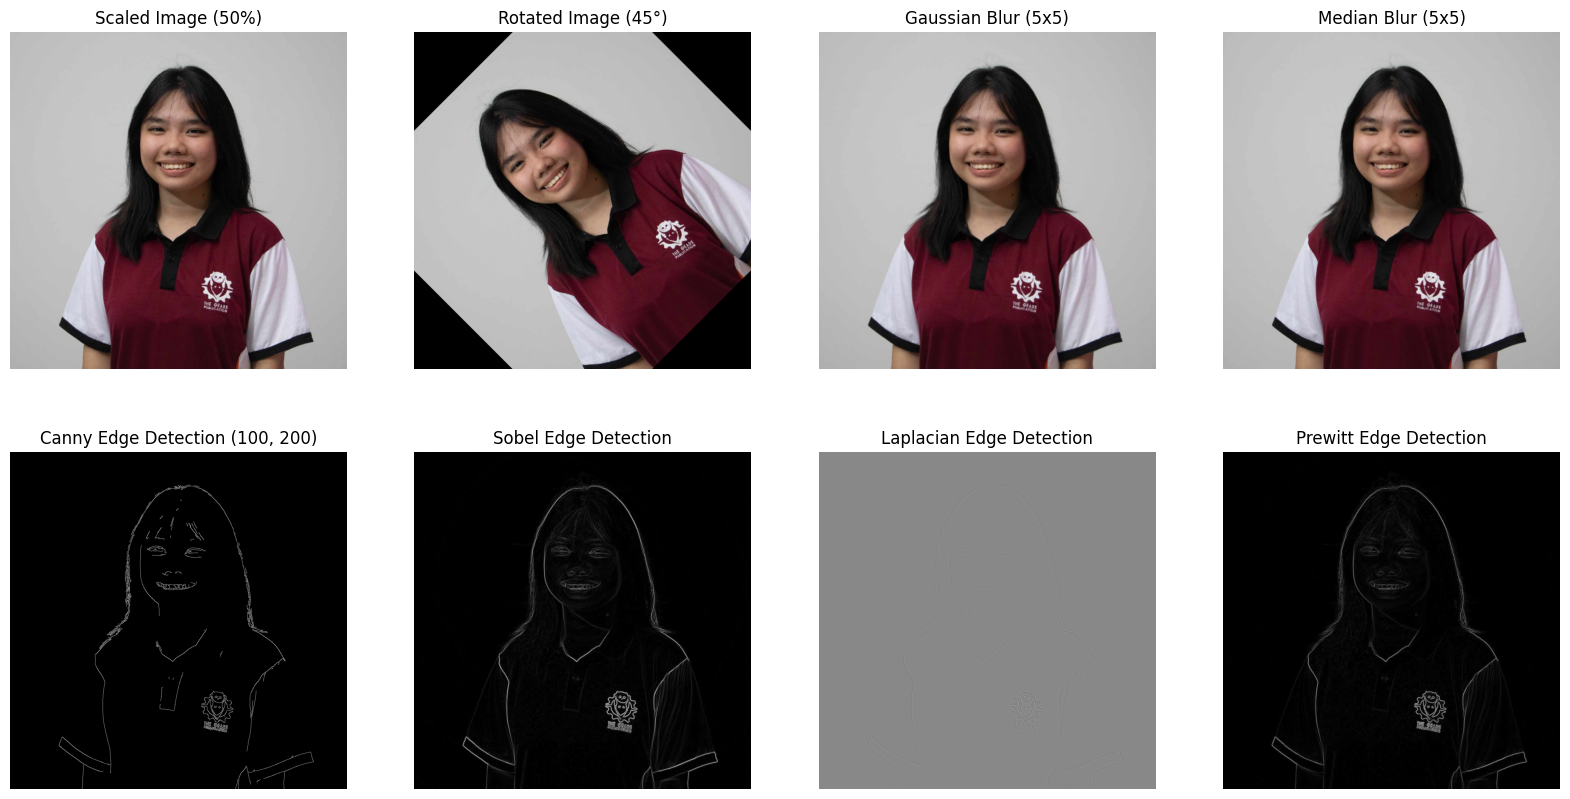

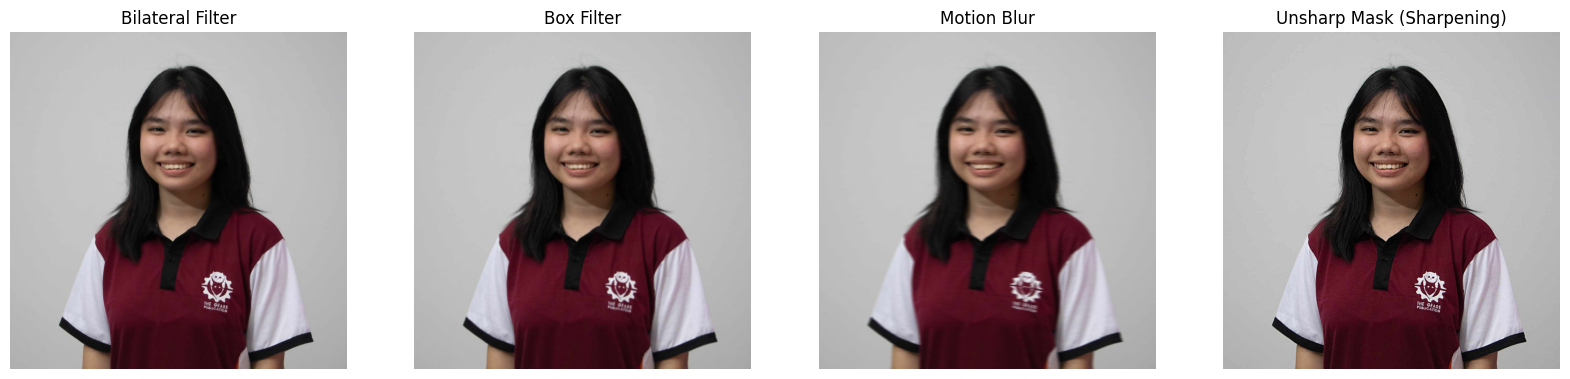

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image (50%)")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (45°)")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur (5x5)")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur (5x5)")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection (100, 200)")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

plt.show()

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')

plt.show()